In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import chess
import time
from IPython import display
from word_trainer import record_audio
import struct
import scipy
import matplotlib.pyplot as plt
import soundfile as sf


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sample_game = ['e4', 'e5', 'Nf3', 'Nf6', 'Nc3', 'Nc6']

In [3]:
def get_next_move():
    return sample_game.pop(0)

In [4]:
def move_builder(piece, source_row, source_col, action, dest_row, dest_col):
    
    action_string = ''
    if action == 'kingside castle':
        return 'O-O'
    elif action == 'queenside castle':
        return 'O-O-O'
    elif action == 'takes':
        action_string = 'x'
    
    piece_string = ''
    if piece == 'knight':
        piece_string = 'N'
    elif piece == 'bishop':
        piece_string = 'B'
    elif piece == 'king':
        piece_string = 'K'
    elif piece == 'queen':
        piece_string = 'Q'
    elif piece == 'rook':
        piece_string = 'R'
        
    return piece_string + source_row + source_col + action_string + dest_row + dest_col     

In [5]:
move_builder('bishop', 'e', '3', 'takes', 'd', '4')

'Be3xd4'

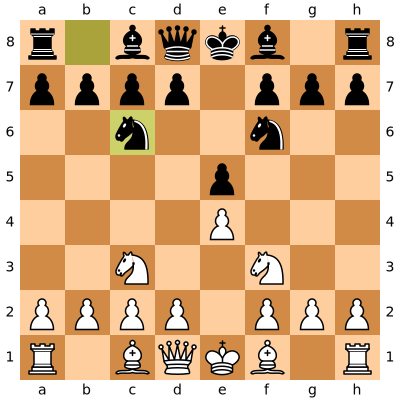

IndexError: pop from empty list

In [6]:
board = chess.Board()

while not board.is_game_over():
    move = get_next_move()
    time.sleep(2)
    try:
        board.push_san(move)
    except:
        pass
    display.clear_output(wait=True)
    display.display(board)

In [50]:
sample = record_audio(n_sec=10, output='out.wav')

* recording
* done recording


In [51]:
data, fs = sf.read('out.wav')

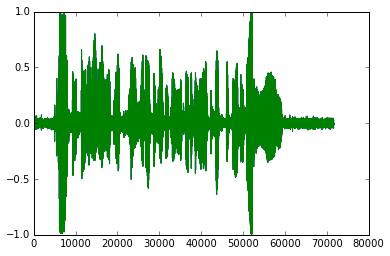

In [52]:
plt.plot(data)

In [54]:
training_list = ['king', 'queen', 'knight', 'bishop', 'rook', 'pawn', 
                 '1', '2', '3', '4', '5', '6', '7', '8',
                'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
                'kingside', 'queenside', 'castle', 'to', 'takes']

In [60]:
for i in range(25):
    for item in training_list:
        if len(item) > 2:
            rec_time = 2
        else:
            rec_time = 1.5
        print('SAY: ' + item)
        record_audio(n_sec=rec_time, output='training/{}_{}.wav'.format(item, i+1))

SAY: king
* recording
* done recording
SAY: queen
* recording
* done recording
SAY: knight
* recording
* done recording
SAY: bishop
* recording
* done recording
SAY: rook
* recording
* done recording
SAY: pawn
* recording
* done recording
SAY: 1
* recording
* done recording
SAY: 2
* recording
* done recording
SAY: 3
* recording
* done recording
SAY: 4
* recording
* done recording
SAY: 5
* recording
* done recording
SAY: 6
* recording
* done recording
SAY: 7
* recording


KeyboardInterrupt: 